## Bible-1_06_Ensemble
Please visit below links, Ensemble theories and Implementation are explained.

## English


*   Theory : https://wikidocs.net/165452 and https://wikidocs.net/165453 and https://wikidocs.net/165454 and https://wikidocs.net/165454
*   Implementation : https://wikidocs.net/165473 and https://wikidocs.net/165474  and https://wikidocs.net/165475


## 한글



*   이론 : https://wikidocs.net/164322 and https://wikidocs.net/164645 and https://wikidocs.net/164307 and https://wikidocs.net/164356
*   구현 : https://wikidocs.net/165167 and https://wikidocs.net/164740 and https://wikidocs.net/165000



Baseline Code can be obtained by importing "06_62_stacking_Pytorch_MNIST_one_model_case_2.py" from the same Github repository.

Below part is same as baseline code.

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



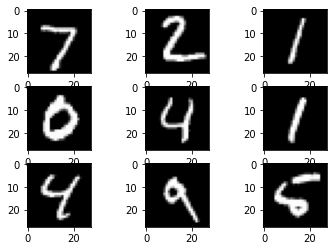

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 256 
num_classes = 10
EPOCHS = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_ds = torch.utils.data.DataLoader(dataset=train_dataset,
                                       batch_size=batch_size, 
                                       shuffle=True)

test_ds = torch.utils.data.DataLoader(dataset=test_dataset,
                                      batch_size=batch_size, 
                                      shuffle=False)

# plot first few images
examples = iter(test_ds)
example_data, example_targets = examples.next()

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(example_data[i][0], cmap=plt.get_cmap('gray'))
    # if you want to invert color, you can use 'gray_r'. this can be used only for MNIST, Fashion MNIST not cifar10
    # pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray_r'))
    
# show the figure
plt.show()

When using different models as sub-models, the dense (linear) layer that comes after the maxpooling layer must be designated separately.

```
        self.d1_2 = nn.Linear(128 * 5 * 5, 256) 
        self.d1_3 = nn.Linear(64 * 13 * 13, 256) 
```

In the case of the second sub-model, compared to the baseline model, one layer was removed and the model was constructed.

```
        x2 = self.conv1(x)
        x2 = self.relu1(x2)
        x2 = self.maxpool2d1(x2)
        x2 = self.conv2(x2)
        x2 = self.relu2(x2)
        x2 = self.maxpool2d3(x2)
        x2 = x2.view(x2.size(0), -1)
        x2 = self.d1_2(x2)
        x2 = self.d2(x2)
        x2 = self.d3(x2)
```

In the case of the third sub-model, compared to the baseline model, two layers were removed and the model was constructed.

```
        x3 = self.conv1(x)
        x3 = self.relu1(x3)
        x3 = self.maxpool2d1(x3)
        x3 = x3.view(x3.size(0), -1)
        x3 = self.d1_3(x3)
        x3 = self.d2(x3)
        x3 = self.d3(x3)
```


In [2]:
# 3-Layers Convolution neural network with one hidden layer
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        self.maxpool2d1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.maxpool2d2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0)
        self.relu3 = nn.ReLU()
        self.maxpool2d3 = nn.MaxPool2d(kernel_size=2)
        self.d1 = nn.Linear(256 * 1 * 1, 256) 
        self.d1_2 = nn.Linear(128 * 5 * 5, 256) 
        self.d1_3 = nn.Linear(64 * 13 * 13, 256) 
        self.d2 = nn.Dropout(0.2)
        self.d3 = nn.Linear(256, 256) 
        self.d4 = nn.Linear(256*3, num_classes) 

    def forward(self, x):
        
        x1 = self.conv1(x)
        x1 = self.relu1(x1)
        x1 = self.maxpool2d1(x1)
        x1 = self.conv2(x1)
        x1 = self.relu2(x1)
        x1 = self.maxpool2d2(x1)
        x1 = self.conv3(x1)
        x1 = self.relu3(x1)
        x1 = self.maxpool2d3(x1)
        x1 = x1.view(x1.size(0), -1)
        x1 = self.d1(x1)
        x1 = self.d2(x1)
        x1 = self.d3(x1)
        
        x2 = self.conv1(x)
        x2 = self.relu1(x2)
        x2 = self.maxpool2d1(x2)
        x2 = self.conv2(x2)
        x2 = self.relu2(x2)
        x2 = self.maxpool2d3(x2)
        x2 = x2.view(x2.size(0), -1)
        x2 = self.d1_2(x2)
        x2 = self.d2(x2)
        x2 = self.d3(x2)

        x3 = self.conv1(x)
        x3 = self.relu1(x3)
        x3 = self.maxpool2d1(x3)
        x3 = x3.view(x3.size(0), -1)
        x3 = self.d1_3(x3)
        x3 = self.d2(x3)
        x3 = self.d3(x3)

        # Concatenate in dim1 (feature dimension)
        out = torch.cat((x1, x2, x3), 1)
        
        out = self.d4(out)
        
        return out
    
# model = CNN_Model(input_size, hidden_size, num_classes).to(device)
model = CNN_Model().to(device)

Other parts are same as baseline code.

In [3]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_ds)

def train_step(model, images, labels):
    model.train()
    # origin shape: [100, 1, 28, 28]
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss_val = loss.item()

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Pytorch need a manual coding for accuracy
    # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)           
    n_samples = labels.size(0)
    n_correct = (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    
    return loss_val, acc

def test_step(model, images, labels):
    model.eval()
    # origin shape: [100, 1, 28, 28]
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss_val = loss.item()

    # Pytorch need a manual coding for accuracy
    # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)           
    n_samples = labels.size(0)
    n_correct = (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    
    return loss_val, acc

from tqdm import tqdm, tqdm_notebook, trange

for epoch in range(EPOCHS):
    
    with tqdm_notebook(total=len(train_ds), desc=f"Train Epoch {epoch+1}") as pbar:    
        train_losses = []
        train_accuracies = []
        
        for i, (images, labels) in enumerate(train_ds):
         
            loss_val, acc = train_step(model, images, labels)
            
            train_losses.append(loss_val)
            train_accuracies.append(acc)
            
            pbar.update(1)
            pbar.set_postfix_str(f"Loss: {loss_val:.4f} ({np.mean(train_losses):.4f}) Acc: {acc:.3f} ({np.mean(train_accuracies):.3f})")


    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        
        with tqdm_notebook(total=len(test_ds), desc=f"Test_ Epoch {epoch+1}") as pbar:    
            test_losses = []
            test_accuracies = []

            for images, labels in test_ds:
                loss_val, acc = test_step(model, images, labels)

                test_losses.append(loss_val)
                test_accuracies.append(acc)

                pbar.update(1)
                pbar.set_postfix_str(f"Loss: {loss_val:.4f} ({np.mean(test_losses):.4f}) Acc: {acc:.3f} ({np.mean(test_accuracies):.3f})")
            


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Train Epoch 1:   0%|          | 0/600 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


Test_ Epoch 1:   0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch 2:   0%|          | 0/600 [00:00<?, ?it/s]

Test_ Epoch 2:   0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch 3:   0%|          | 0/600 [00:00<?, ?it/s]

Test_ Epoch 3:   0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch 4:   0%|          | 0/600 [00:00<?, ?it/s]

Test_ Epoch 4:   0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch 5:   0%|          | 0/600 [00:00<?, ?it/s]

Test_ Epoch 5:   0%|          | 0/100 [00:00<?, ?it/s]